In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input


In [ ]:
# Load the dataset
df = pd.read_excel('1-s2.0-S2352340918309600-mmc2.xlsx')
df

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,3.000,4.200,4.900,12,128.72872,6,1,27.885,3.96400,'Very Low'
1,4.727,5.545,6.364,12,128.72872,6,1,10.935,10.22700,'Very Low'
2,29.727,31.273,31.909,12,128.72872,6,1,27.598,0.06955,'Low'
3,12.200,13.700,14.800,12,128.72872,6,1,27.885,3.96400,'Low'
4,7.528,8.636,9.364,12,128.72872,6,1,24.653,213.72500,'Very Low'
...,...,...,...,...,...,...,...,...,...,...
2445,12.909,7.545,2.636,4,732.95900,4,3,47.510,41.34300,'Very Low'
2446,1.182,1.000,0.091,4,732.95900,4,3,36.793,84.64600,'Very Low'
2447,2.167,0.833,0.083,4,732.95900,4,3,53.364,79.33200,'Very Low'
2448,4.667,4.250,1.417,4,732.95900,4,3,36.793,84.64600,'Very Low'


In [ ]:
features = [
    'Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
    'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
    'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps'
]
label = 'Class_Name'

X = df[features]  # Feature matrix
y = df[label]  # Target labels

In [ ]:
# Normalize the data for LSTM
scaler = MinMaxScaler()
X[features] = scaler.fit_transform(X[features])


<ipython-input-4-faeae3c6333c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = scaler.fit_transform(X[features])


In [ ]:
# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# SVM Model
svm_model = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:

# Evaluate SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.94

SVM Classification Report:
              precision    recall  f1-score   support

      'High'       1.00      1.00      1.00         2
       'Low'       0.00      0.00      0.00        31
    'Medium'       0.00      0.00      0.00         5
  'Very Low'       0.94      1.00      0.97       575

    accuracy                           0.94       613
   macro avg       0.49      0.50      0.49       613
weighted avg       0.89      0.94      0.91       613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Gaussian Naïve Bayes Model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [ ]:
# Evaluate Gaussian Naïve Bayes Model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"\nGaussian Naïve Bayes Accuracy: {accuracy_gnb:.2f}")
print("\nGaussian Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))


Gaussian Naïve Bayes Accuracy: 0.57

Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

      'High'       0.18      1.00      0.31         2
       'Low'       0.10      0.90      0.18        31
    'Medium'       0.75      0.60      0.67         5
  'Very Low'       1.00      0.55      0.71       575

    accuracy                           0.57       613
   macro avg       0.51      0.76      0.47       613
weighted avg       0.95      0.57      0.68       613



In [ ]:
# Prepare data for LSTM
sequence_length = 10  # Sequence length for LSTM
X_lstm, y_lstm = [], []
for i in range(len(df) - sequence_length):
    X_lstm.append(df[features].iloc[i:i+sequence_length].values)
    y_lstm.append(df['Class_Name'].iloc[i+sequence_length])  # Use the next value as target

X_lstm = np.array(X_lstm)
y_lstm = pd.get_dummies(y_lstm).values  # One-hot encode the target classes


In [ ]:
# Split data into training and testing sets for LSTM
train_size = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]


In [ ]:
# Build LSTM model
model = Sequential([
    Input(shape=(sequence_length, len(features))),  # Use Input layer to define input shape
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(y_train_lstm.shape[1], activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the LSTM model
history = model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7887 - loss: 0.8301 - val_accuracy: 1.0000 - val_loss: 0.0877
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9062 - loss: 0.3254 - val_accuracy: 1.0000 - val_loss: 0.0549
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8846 - loss: 0.3536 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8974 - loss: 0.3147 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8903 - loss: 0.3111 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9051 - loss: 0.2826 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8949 - loss: 0.3062 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8869 - loss: 0.3210 - val_accuracy: 1.0000 - v

In [ ]:
# Evaluate the LSTM model
y_pred_lstm = model.predict(X_test_lstm)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)
y_test_classes_lstm = np.argmax(y_test_lstm, axis=1)

accuracy_lstm = accuracy_score(y_test_classes_lstm, y_pred_classes_lstm)
print(f"\nLSTM Accuracy: {accuracy_lstm:.2f}")
print("\nLSTM Classification Report:")
print(classification_report(y_test_classes_lstm, y_pred_classes_lstm))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

LSTM Accuracy: 1.00

LSTM Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       488

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488



Model Comparison:
SVM Accuracy: 0.9413
Naïve Bayes Accuracy: 0.5693
LSTM Accuracy: 1.0000


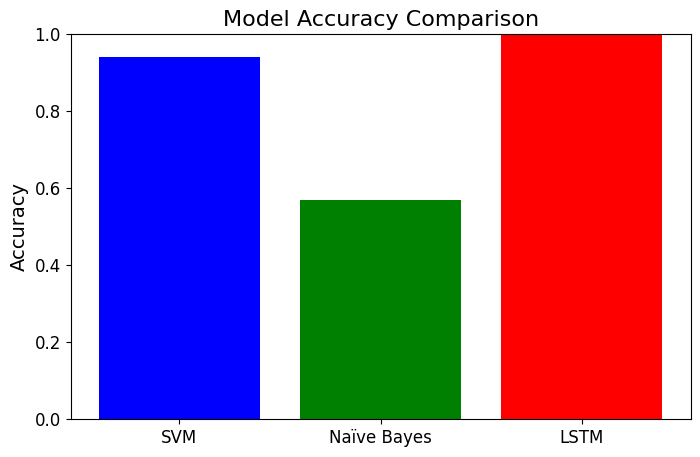

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracies of each model
svm_accuracy = accuracy_score(y_test, y_pred_svm)  # Replace with your SVM accuracy variable
nb_accuracy = accuracy_score(y_test, y_pred_gnb)    # Replace with your Naïve Bayes accuracy variable
lstm_accuracy = accuracy_score(np.argmax(y_test_lstm, axis=1), y_pred_classes_lstm)  # LSTM accuracy

# Create a dictionary for comparison
model_accuracies = {
    "SVM": svm_accuracy,
    "Naïve Bayes": nb_accuracy,
    "LSTM": lstm_accuracy
}

# Print the accuracies
print("Model Comparison:")
for model, acc in model_accuracies.items():
    print(f"{model} Accuracy: {acc:.4f}")

# Bar plot for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to show percentages
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
